---
title: "Practicum Process Technology - Population Balance"
author: "Mattia Galanti"
update: "10/11/2025"
---

Rabbit's population balance

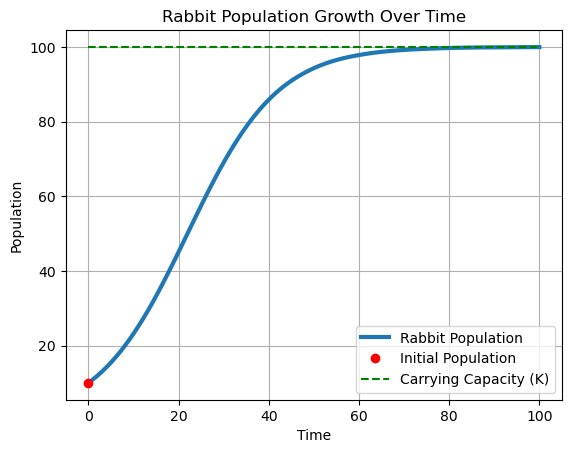

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def rabbit_population(t, y, r, K):
    dydt = r * y * (1 - y / K)
    return dydt

# Parameters
r = 0.1  # growth rate
K = 100  # carrying capacity
y0 = [10]  # initial population
t_span = (0, 100)  # time span for the simulation
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve ODE
solution = solve_ivp(rabbit_population, 
                     t_span, 
                     y0, 
                     args=(r, K), 
                     t_eval=t_eval)

# Plot results
plt.plot(solution.t, solution.y[0], label='Rabbit Population', linewidth=3)
plt.plot(0, y0, 'ro', label='Initial Population')
plt.hlines(K, colors='g', linestyles='--', label='Carrying Capacity (K)', xmin=t_span[0], xmax=t_span[1])
plt.title('Rabbit Population Growth Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

Different initial conditions solutions for the rabbit population balance ODE using `scipy.integrate.solve_ivp`.

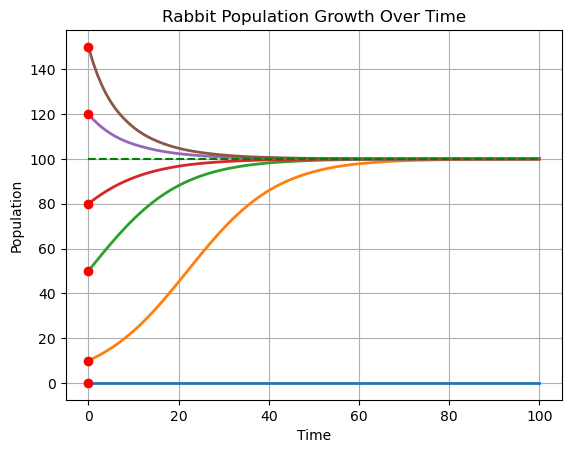

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def rabbit_population(t, y, r, K):
    dydt = r * y * (1 - y / K)
    return dydt

# Parameters
r = 0.1  # growth rate
K = 100  # carrying capacity
y0s = [0, 10, 50, 80, 120, 150]  # initial population
t_span = (0, 100)  # time span for the simulation
t_eval = np.linspace(t_span[0], t_span[1], 100)

for N0 in y0s:
    solution = solve_ivp(rabbit_population, 
                         t_span, 
                         [N0], 
                         args=(r, K), 
                         t_eval=t_eval)

    # Plot results
    plt.plot(solution.t, solution.y[0], label=f'Rabbit Population (N0={N0})', linewidth=2)
    plt.plot(0, N0, 'ro', label='Initial Population')
    
plt.hlines(K, colors='g', linestyles='--', label='Carrying Capacity (K)', xmin=t_span[0], xmax=t_span[1])
plt.title('Rabbit Population Growth Over Time')
plt.xlabel('Time')
plt.ylabel('Population')
plt.grid()
plt.show()

Phase space plots

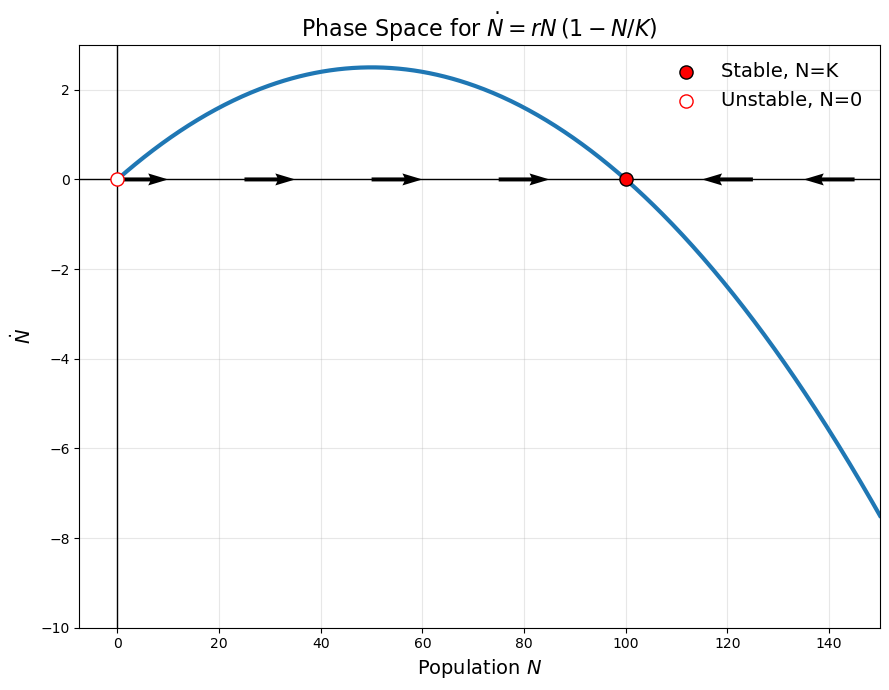

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def y_dot(t, y, r, K):
    return r * y * (1 - y / K)

# Parameters
r = 0.1
K = 100.0
Nmax = 150.0
N_vec = np.linspace(0, Nmax, 600)

# --- Phase curve dN/dt vs N ---
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(N_vec, y_dot(None, N_vec, r, K), linewidth=3)

# Axes lines
ax.axhline(0, linewidth=1, color='black')
ax.axvline(0, linewidth=1, color='black')

# --- Arrows along N-axis (direction of motion) ---
eps = 1e-6
N_ar = np.array([0+eps, K/4, K/2, 3*K/4, (K+Nmax)/2, Nmax-5])
u = np.sign(y_dot(None, N_ar, r, K)).astype(float)
u[u == 0] = 0  # tiny arrow if exactly zero
v = np.zeros_like(N_ar)

ax.quiver(N_ar, np.zeros_like(N_ar), u, v,
          angles='xy', scale_units='xy', scale=0.1, width=0.005, zorder=4)

# --- Equilibria (fixed points) ---
N_fp = np.array([0.0, K])
y_fp = np.zeros_like(N_fp)
# Stability via f'(N)=r(1-2N/K): stable if negative
fprime = r * (1 - 2*N_fp/K)
stable = fprime < 0

ax.scatter(N_fp[stable], y_fp[stable], s=90, facecolor='red', edgecolor='black', zorder=5, label='Stable, N=K')
ax.scatter(N_fp[~stable], y_fp[~stable], s=90, facecolor='white',  edgecolor='red', zorder=5, label='Unstable, N=0')

# Labels & formatting
ax.set_xlim(None, Nmax)
ax.set_ylim(-10, 3)
ax.set_xlabel(r"Population $N$", fontsize=14)
ax.set_ylabel(r"$\dot N$", fontsize=14)
ax.set_title(r"Phase Space for $\dot N = rN\,(1-N/K)$", fontsize=16)
ax.legend(frameon=False, loc='upper right', fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
